# Data Science CoderHouse [61690]



### Alumno: [Javier Alcoba]

## Introducción
El análisis y predicción de que distintas comorbilidades sean potenciadores en el deceso de gente con COVID es el objetivo de este análisis.


## Descripción del Problema
Para esto, se cuenta con una base de datos de más de 1 millón de filas y 21 columnas que contienen, en su mayoría valores "booleanos" sobre si tiene el paciente una enfermedad o no, sumado al status de si dicho paciente falleció a causa de COVID o no. Se indica "booleano" entre comillas porque hay otros valores además del 1 (positivo) y 2 (negativo). Los nros 97 al 99 también se muestran en la base de datos para representar información faltante.

## Objetivo

El objetivo principal es el de entrenar a una IA para poder predecir la probabilidad de que un paciente con COVID muera, dependiendo de la enfermedad previa que tenga. Para esto se entrenarán algunos modelos con parte de la base de datos y se utilizará la porción restante de la misma para testear el predictor.

## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data

Este dataset contiene más de 1.000.000 DE líneas de datos respecto a diferentes pacientes que contrageron COVID 19. De los mismos, se indica además qué comorbilidad tenían previo al contagio y si fallecieron o no.

## Importación de Librerías y Carga de Datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 '1ra Entrega Data Science I - Javier Alcoba.ipynb',
 'BTCUSD_1hr.csv',
 'Clase 1.ipynb',
 'Clase 3 - ejemplo1.ipynb',
 'Clase_03 vieja.ipynb',
 'Clase_03.ipynb',
 'Clase_07 (1).ipynb',
 'Clase_08.ipynb',
 'Clase_15.ipynb',
 'Clase_18_silvia.ipynb',
 'clase_2_practica.ipynb',
 'Clase_4.ipynb',
 'Clase_5.ipynb',
 'Copia de Untitled0.ipynb',
 'Copia_de_Ejercicio_Regresion.ipynb',
 'Covid Data.csv',
 'COVID-19 Dataset.txt',
 'Credit score classification.txt',
 'Customer purchase behavior - Electronic Sales Data.txt',
 'Data Science I - Proyecto Final - Javier Alcoba.ipynb',
 'ejemplo_ds_entrega03.ipynb',
 'Electronic_sales_Sep2023-Sep2024.csv',
 'employee_data.csv',
 'Extended_Employee_Performance_and_Productivity_Data.csv',
 'glassdoordata.csv',
 'heart attack risk prediction dataset.txt',
 'heart_attack_prediction_dataset.csv',
 'link kaggle.txt',
 'Spotify Tracs Dataset.txt',
 'Spotify_dataset.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb'

In [3]:
df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

Para esto, se utiliza el método .info() del dataframe llamado 'df'.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

# El conjunto de datos contiene un total de 1.048.575 filas (registros) y 21 columnas (variables).

Como se puede observar en la cuenta de not-null, el número coincide con la cantidad de filas para cada una de las columnas. Esto significa que, en principio, no hay ninguna "celda" vacía en este dataset. No obstante, la base indica que los valores 97, 98 y 99 significan "datos faltantes". A continuación se realizará el análisis de los datos faltantes para tomar una decisión para cada uno de ellos.



**Variables Potencialmente Relevantes:**

**SEX:** Sexo del paciente.

**PREGNANT:** Si la paciente estaba o no embarazada.

**INTUBED:** Si el paciente estaba intubado.

**PNEUMONIA:** Si el paciente tenía pneumonía.

**COPD:** Si el paciente tuvo o no EPOC (enfermdad pulmonar)

**DIABETES:** Paciente con diabetes.
 
**INMSUPR:** Si el paciente sufría de de inmunodeficiencia suprimida.

**HIPERTENSION:** Si el paciente tenía Hipertensión.

**OTHER_DISEASE:** Si el paciente tenía una enfermdad distinta a las de la tabla.

**CARDIOVASCULAR:** Si el paciente sufría de enfermedad de corazón.

**OBESITY:** Si el paciente estaba excedido de peso.

**RENAL_CHRONIC:** Si el paciente tenía problemas renales crónicos.

**TOBACCO:** Si el paciente fumaba.

**ICU:** Si el paciente estaba internado en una unidad de terapia intensiva.

In [5]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


# Análisis de cantidad de celdas sin información

Se revisará el conteo de celdas con valores 97, 98 o 99 como valor para cada columna

In [6]:
dicc_Celdas_Vacias = {}
for columna in df:
    dicc_Celdas_Vacias[columna] = df[columna].isin({97, 98, 99}).sum()
dicc_Celdas_Vacias

{'USMER': 0,
 'MEDICAL_UNIT': 0,
 'SEX': 0,
 'PATIENT_TYPE': 0,
 'DATE_DIED': 0,
 'INTUBED': 855869,
 'PNEUMONIA': 16003,
 'AGE': 345,
 'PREGNANT': 527265,
 'DIABETES': 3338,
 'COPD': 3003,
 'ASTHMA': 2979,
 'INMSUPR': 3404,
 'HIPERTENSION': 3104,
 'OTHER_DISEASE': 5045,
 'CARDIOVASCULAR': 3076,
 'OBESITY': 3032,
 'RENAL_CHRONIC': 3006,
 'TOBACCO': 3220,
 'CLASIFFICATION_FINAL': 0,
 'ICU': 856032}

# Revisión de matriz de correlaciones

Se revisará la matriz de correlaciones para encontrar columnas que puedan eliminarse por tener una fuerte correlación con otras variables. Primero se modificará la columna **"DATE_DIED"**, que cuando vale 9999-99-99 significa que no murió y si tiene una fecha válida, sí murió (en esa fecha) por los valores 2 para No murió y 1 para murió. De esta forma, se podrá realizar la matriz de correlaciones.


In [7]:
# Cambio de valores, para expresar el no muerto como 2, en vez de 9999-99-99 y como 1 el muerto, en vez de la fecha de muerte
df['DATE_DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 2, 1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,1,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
# Matriz de correlación de variables
def plotCorrelationMatrix(df, graphWidth):
    nombre = 'Dataset'
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    
    plt.title(f'Matriz de correlaciones del {nombre}', fontsize=15)
    plt.show()

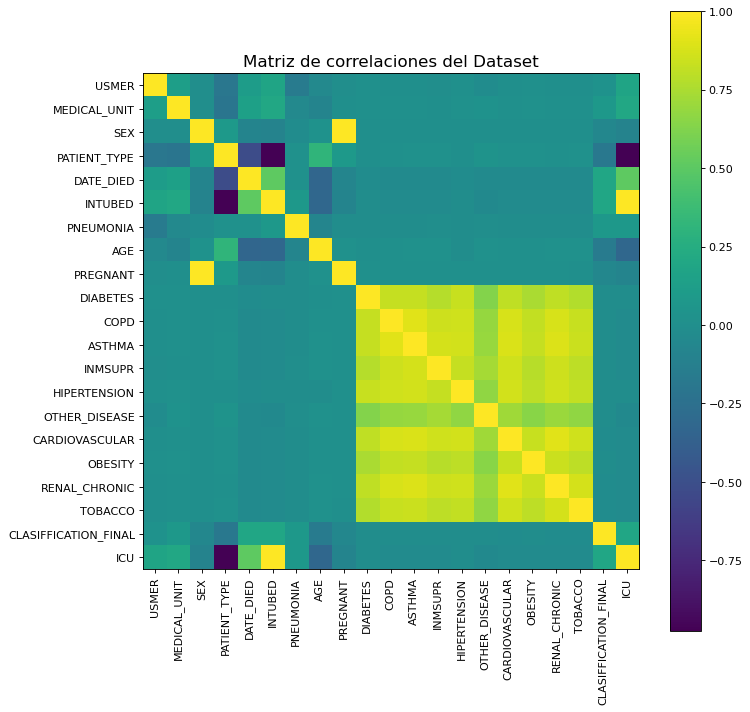

In [9]:
plotCorrelationMatrix(df, 10)

Como se puede observar, variables fuertemente interrelacionadas son, por ejemplo, INTUBED con ICU. Esto tiene sentido puesto que, prácticamente todo el tiempo que intuban a alguien, es porque lo internaron en una Unidad de Cuidados Intensivos. Teniendo en cuenta que faltan más de 850000 datos tanto de ICU como intubados, lo mejor sería eliminar ambas columnas, puesto que la información faltante corresponde aproximadamente, al 80% del dataset. Más adelante, no obstante, se realizará un gráfico de muertos intubados vs muertos no intubados para los 250000 casos de los que se cuenta con información.

Además, las variables "PREGNANT" y "SEX" están fuertemente relacionadas porque sólo las mujeres pueden quedar embarazadas. Para este caso, se tomará la decisión más adelante eliminar la columna PREGNANT o SEX, a la hora de entrenar la IA para predecir si un paciente muere o no dependiendo de las comorbilidades presentes en el mismo.

El resto de la matriz muestra cierta correlación entre comorbilidades, pero se estima no son lo suficientemente fuertes como para afectar el aprendizaje de la IA por overfitting.

In [10]:
# Elimino las columnas ICU, INTUBED, PREGNANT, de acuerdo al análisis de la matriz de correlación
df_limpio = df.copy()
df_limpio = df_limpio.drop('INTUBED', axis=1)
df_limpio = df_limpio.drop('ICU', axis=1)
df_limpio = df_limpio.drop('PREGNANT', axis=1)
df_limpio

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,1,72,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,1,2,68,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,2,40,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,2,2,51,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,2,2,55,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,2,2,28,2,2,2,2,2,2,2,2,2,2,7


Luego de eliminar las 3 columnas que mejorarían el entrenamiento de la IA, se procede a revisar los datos faltantes de cada columna nuevamente

In [11]:
dicc_Celdas_Vacias = {}
for columna in df_limpio:
    dicc_Celdas_Vacias[columna] = df_limpio[columna].isin({97, 98, 99}).sum()
dicc_Celdas_Vacias

{'USMER': 0,
 'MEDICAL_UNIT': 0,
 'SEX': 0,
 'PATIENT_TYPE': 0,
 'DATE_DIED': 0,
 'PNEUMONIA': 16003,
 'AGE': 345,
 'DIABETES': 3338,
 'COPD': 3003,
 'ASTHMA': 2979,
 'INMSUPR': 3404,
 'HIPERTENSION': 3104,
 'OTHER_DISEASE': 5045,
 'CARDIOVASCULAR': 3076,
 'OBESITY': 3032,
 'RENAL_CHRONIC': 3006,
 'TOBACCO': 3220,
 'CLASIFFICATION_FINAL': 0}

Finalmente, teniendo en cuenta que aun quitando los valores desconocidos de cada columna, aun así quedarían cerca de 1.000.000 de datos, se procederá a eliminar las filas donde se encuentre un dato faltante:


In [12]:
# Elimino todas las filas que tengas datos faltantes
df_sinNA = df_limpio.copy()
for columna in df_limpio.columns:
    df_sinNA = df_sinNA[~(df_sinNA[columna].isin([97, 98, 99]))]
dicc_Celdas_Vacias = {}
for columna in df_sinNA:
    dicc_Celdas_Vacias[columna] = df_sinNA[columna].isin({97, 98, 99}).sum()
dicc_Celdas_Vacias

{'USMER': 0,
 'MEDICAL_UNIT': 0,
 'SEX': 0,
 'PATIENT_TYPE': 0,
 'DATE_DIED': 0,
 'PNEUMONIA': 0,
 'AGE': 0,
 'DIABETES': 0,
 'COPD': 0,
 'ASTHMA': 0,
 'INMSUPR': 0,
 'HIPERTENSION': 0,
 'OTHER_DISEASE': 0,
 'CARDIOVASCULAR': 0,
 'OBESITY': 0,
 'RENAL_CHRONIC': 0,
 'TOBACCO': 0,
 'CLASIFFICATION_FINAL': 0}

Como se puede observar, ya no hay datos desconocidos en las columnas. Se hará un info para revisar cuántas filas quedaron...

In [13]:
df_sinNA.info

<bound method DataFrame.info of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  PNEUMONIA  AGE  \
0            2             1    1             1          1          1   65   
1            2             1    2             1          1          1   72   
2            2             1    2             2          1          2   55   
3            2             1    1             1          1          2   53   
4            2             1    2             1          1          2   68   
...        ...           ...  ...           ...        ...        ...  ...   
1048570      2            13    2             1          2          2   40   
1048571      1            13    2             2          2          2   51   
1048572      2            13    2             1          2          2   55   
1048573      2            13    2             1          2          2   28   
1048574      2            13    2             1          2          2   52   

         DIABETES  COPD  ASTHMA

Como se puede ver, quedaron **1024829** filas sin datos desconocidos. Se procederá a realizar algunas hipótesis con el dataset original, y se dejará el dataset **df_sinNA** como referencia para tomar una muestra no mayor a 10000 filas para realizar el proceso de entrenamiento del algoritmo a utilizar y luego testear el resultado.

### Hipótesis planteadas

1.   Los pacientes muertos por COVID tienen mayor probabilidad de tener una comorbilidad que los que no murieron.
2.   La edad de los pacientes intubados es menor en los casos de muerte que los casos de los intubados que sobrevivieron
3.   Los pacientes que presentaban previamente pneumonía tienen mayor probabilidad de morir que los que no tenían pneumonía.
4.   Hay una correlación entre los pacientes que murieron al ser intubados vs los pacientes que murieron al no ser intubados.





### Análisis de tabla de muertos vs tabla de no muertos

In [14]:
# Filtrar los datos por despedidos)
df_muertos = df_sinNA[df_sinNA['DATE_DIED'] == 1]

df_muertos.describe()



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,74612.000000,74612.000000,74612.000000,74612.000000,74612.0,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000,74612.000000
mean,1.438669,6.942194,1.643770,1.910658,1.0,1.293264,61.097250,1.629215,1.948534,1.980660,1.966614,1.579062,1.940814,1.942610,1.774192,1.925575,1.914277,3.960462
std,0.496228,3.652615,0.478887,0.285239,0.0,0.455261,15.204216,0.483018,0.220948,0.137718,0.179644,0.493713,0.235974,0.232588,0.418116,0.262463,0.279957,1.680508
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,2.000000,1.0,1.000000,52.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,1.000000,4.000000,2.000000,2.000000,1.0,1.000000,62.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
75%,2.000000,12.000000,2.000000,2.000000,1.0,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000
max,2.000000,13.000000,2.000000,2.000000,1.0,2.000000,109.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [15]:
df_intubados = df[df['INTUBED'] < 3]

In [16]:
# Filtrar los datos por vivos)
df_no_muertos = df_sinNA[df_sinNA['DATE_DIED'] == 2]

df_no_muertos.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,950217.000000,950217.000000,950217.000000,950217.000000,950217.0,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.000000,950217.00000,950217.000000
mean,1.658101,9.154921,1.488059,1.130268,2.0,1.910801,40.360412,1.900336,1.988974,1.969428,1.988330,1.865251,1.976122,1.983372,1.852567,1.986547,1.91975,5.395633
std,0.474346,3.679758,0.499858,0.336598,0.0,0.285030,15.877779,0.299551,0.104424,0.172155,0.107395,0.341456,0.152668,0.127872,0.354537,0.115203,0.27168,1.865238
min,1.000000,1.000000,1.000000,1.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.0,2.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,3.000000
50%,2.000000,12.000000,1.000000,1.000000,2.0,2.000000,39.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,7.000000
75%,2.000000,12.000000,2.000000,1.000000,2.0,2.000000,50.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,7.000000
max,2.000000,13.000000,2.000000,2.000000,2.0,2.000000,121.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,7.000000


Como se puede ver entre las descripciones de muertos y no muertos, hay algunos cambios de media para algunas features, aunque las correspondientes a las comorbilidades estarían rondando el valor 2, dando a entender que la media de pacientes no presentaba la mayoría de las comorbilidades.

### Edad promedio de pacientes que murieron intubados vs pacientes que sobrevivieron intubados

Text(0.5, 1.0, 'AGE vs. INTUBED DEAD')

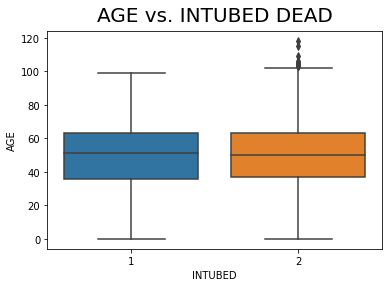

In [17]:
df_intubados = df[df['INTUBED'] < 3]
df_intubados
df_intubados_no_muertos = df_intubados[df_intubados['DATE_DIED'] == 1]
df_intubados_no_muertos
df_intubados_muertos = df_intubados[df_intubados['DATE_DIED'] == 2]
df_intubados_muertos

sns.boxplot(x='INTUBED', y = 'AGE', data = df_intubados_muertos) 
plt.title("AGE vs. INTUBED DEAD", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'AGE vs. INTUBED ALIVE')

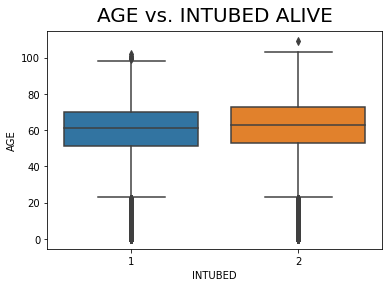

In [18]:
sns.boxplot(x='INTUBED', y = 'AGE', data = df_intubados_no_muertos) 
plt.title("AGE vs. INTUBED ALIVE", fontsize=20, verticalalignment='bottom')

Como se puede observar, se valida la hipótesis en que los intubados que murieron tenían menor edad que los intubados que no murieron. Esto significa que, para la gente más joven, los casos de mucha gravedad causaron que se tuvieran que intubar y varios no sobrevivieran incluso en ese caso. Por otro lado, en los casos en los que se sobrevivió, es más lógico asumir que la gente de mayor edad era más probable que fuera intubada no necesariamente por la gravedad de la enfermedad, sino como forma de proteger de la mejor manera posible al paciente.

Text(0.5, 1.0, 'Murieron vs Pneumonía')

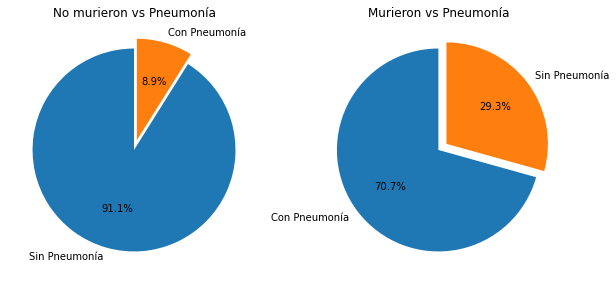

In [19]:
df_muertos_pneumo = df_muertos[df_muertos['PNEUMONIA'] < 3]
df_no_muertos_pneumo = df_no_muertos[df_no_muertos['PNEUMONIA'] < 3]
df_no_muertos_pneumo_cuenta=df_no_muertos_pneumo['PNEUMONIA'].value_counts(normalize=True)
df_muertos_pneumo_cuenta=df_muertos_pneumo['PNEUMONIA'].value_counts(normalize=True)

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
etiquetas_nM = []

for a in range(len(df_no_muertos_pneumo_cuenta.index)):
    if df_no_muertos_pneumo_cuenta.index[a] == 1:
        etiquetas_nM.append("Con Pneumonía")
    else:
        etiquetas_nM.append("Sin Pneumonía")

etiquetas_M = []

for a in range(len(df_muertos_pneumo_cuenta.index)):
    if df_muertos_pneumo_cuenta.index[a] == 1:
        etiquetas_M.append("Con Pneumonía")
    else:
        etiquetas_M.append("Sin Pneumonía")
        
# Se usará el parámetro explode para separar de la torta el porcentaje de muertos" 

explode_nM = [0, 0.1]
explode_M = [0, 0.1] 

# Gráfico de torta para empleados que no renunciaron
axes[0].pie(df_no_muertos_pneumo_cuenta, labels=etiquetas_nM,autopct='%1.1f%%', startangle=90, explode = explode_nM)
axes[0].set_title('No murieron vs Pneumonía')

# Gráfico de torta para empleados que renunciaron
axes[1].pie(df_muertos_pneumo_cuenta, labels=etiquetas_M,autopct='%1.1f%%', startangle=90, explode = explode_M)
axes[1].set_title('Murieron vs Pneumonía')

Como se puede observar, del pool de pacientes que no murieron, sólo el 9% tenía pneumonía, mientras que en el pool de pacientes que murieron, el 70% de ellos tenía pneumonía. Efectivamente se ve una correlación entre la comorbilidad pneumonía y no sobrevivir al COVID. 

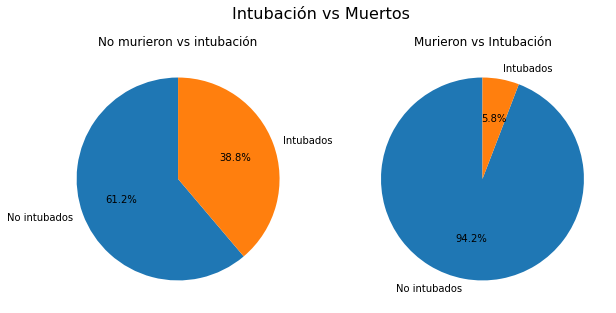

In [20]:
df_no_muertos_pneumo_cuenta.index


# Calcular los porcentajes de intubados muertos vs intubados no muertos

df_intubados_no_muertos_conteo = df_intubados_no_muertos['INTUBED'].value_counts(normalize=True)
df_intubados_muertos_conteo = df_intubados_muertos['INTUBED'].value_counts(normalize=True)

#Se cambia el etiquetado para que 1 se reemplace por Intubados y 2 por No intubados
etiquetasNM = []
for a in range(len(df_intubados_no_muertos_conteo.index)):
    if df_intubados_no_muertos_conteo.index[a] == 1:
        etiquetasNM.append("Intubados")
    else:
        etiquetasNM.append("No intubados")

etiquetasM = []
for a in range(len(df_intubados_muertos_conteo.index)):
    if df_intubados_muertos_conteo.index[a] == 1:
        etiquetasM.append("Intubados")
    else:
        etiquetasM.append("No intubados")        
        

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de torta para empleados que no renunciaron
axes[0].pie(df_intubados_no_muertos_conteo, labels=etiquetasNM,autopct='%1.1f%%', startangle=90)
axes[0].set_title('No murieron vs intubación')

# Gráfico de torta para empleados que renunciaron
axes[1].pie(df_intubados_muertos_conteo, labels=etiquetasM,autopct='%1.1f%%', startangle=90)
axes[1].set_title('Murieron vs Intubación')

plt.suptitle('Intubación vs Muertos', fontsize=16)
plt.show()

Como se puede observar en el primer gráfico de tortas, se encuentra que el 39% de los casos que no murieron, tuvieron al paciente intubado, siendo el 61% restante paciente no internado. Esto puede implicar los casos de avanzada edad que se intubaban para disminuir la probabilidad de deceso.

Por otro lado, en el gráfico de la derecha, se observa que, de los pacientes que murieron, el 94% de los casos se trató de pacientes no intubados. Esto puede significar alguna de las siguientes situaciones:
    
    a) Que el paciente no  tenía disponible una sala de cuidado intensivo para su intubación.
    b) Que el paciente murió antes que hubiera tiempo para intubarlo.
    
Desgraciadamente, no hay suficiente información en el dataset para determinar qué sucedió.

### Matriz de correlación para el dataset depurado

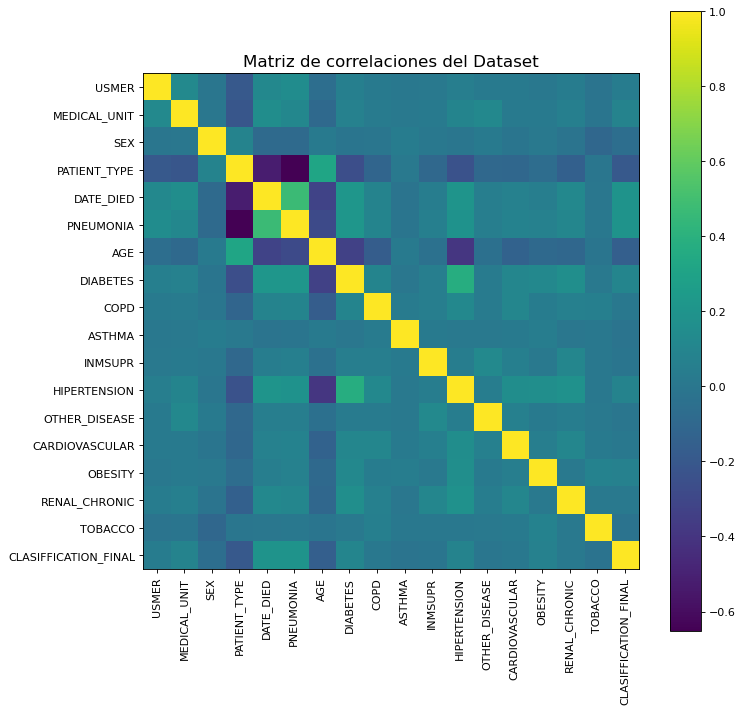

In [21]:
plotCorrelationMatrix(df_sinNA, 10)

Como se puede observar en la matriz de correlación, ya no se ven features fuertemente correlacionadas, lo que representaría una ventaja a la hora de entrenar la IA.

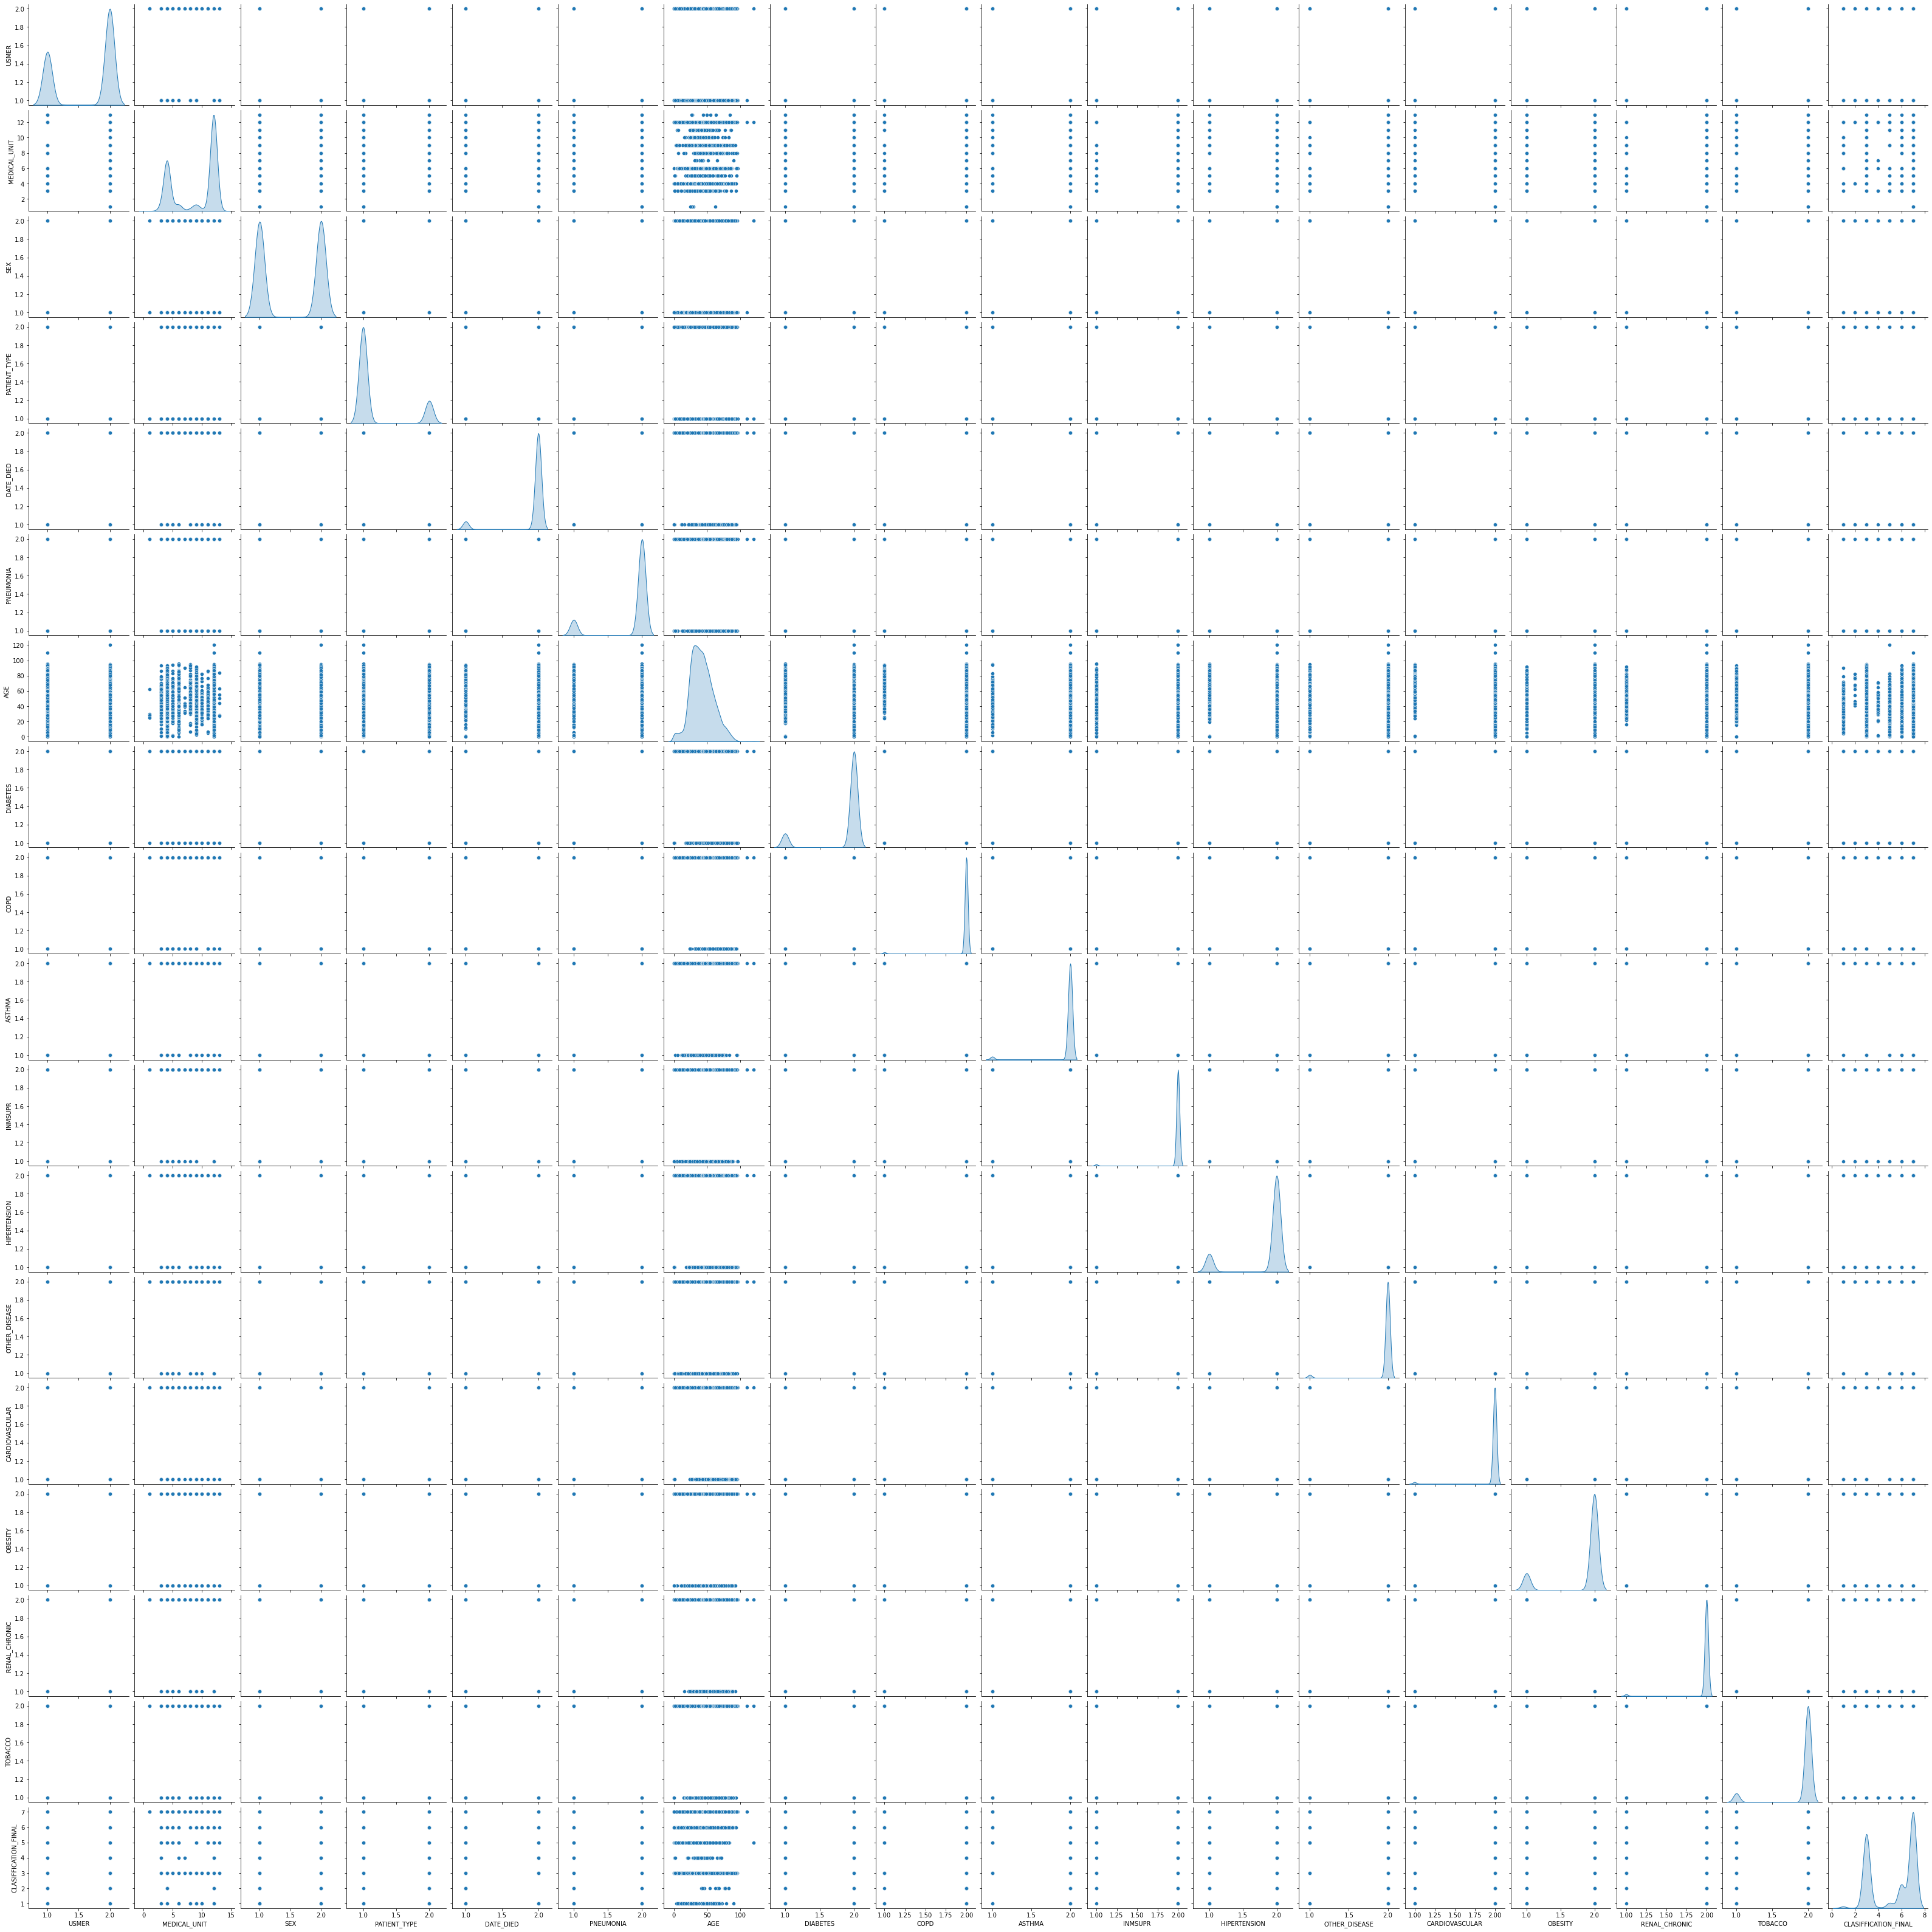

In [22]:
# Se usa random_state para poder replicar este aprendizaje cada vez que se ejecute la notebook

df_muestra = df_sinNA.sample(n=10000, random_state=3256)  

sns.pairplot(df_muestra, diag_kind="kde")

Como se puede ver en estos otros gráficos hechos por seaborn, este dataset tiene más utilidad que los otros usados, por contener información real. No obstante, y teniendo en cuenta que la ejecución original del mismo tardó 15 minutos, se hizo necesario realizarlo tomando una muestra aleatoria. Para tal fin, se tomó una muestra de 10000 filas usando el método **sample**, eligiendo una semilla para que siempre elija los mismos índices y el análisis pueda ser replicado. A su vez, se usará el 90% de esta muestra para entrenar al algoritmo de IA, y el 10% restante para testear el aprendizaje del mismo. Se usará la columna DATE_DIED (si el paciente murió o no) como etiqueta de aprendizaje y será esa misma columna la que deberá predecir con la muestra de testeo.

### Muestra aleatoria de 10000 filas

In [23]:
# Toma una muestra aleatoria de 10000 filas

df_muestra = df_sinNA.sample(n=10000, random_state=3256)  

# Se usará el índice tanto en el muestreo como en el test para evitar usar la misma fila en ambos datasets
train_idx = df_muestra.sample(frac=0.9, random_state=3256).index
test_idx = df_muestra.index.difference(train_idx)

# Crea los DataFrames de entrenamiento y prueba
df_train = df_muestra.loc[train_idx]
df_test = df_muestra.loc[test_idx]

# Separando las características (X) de la variable objetivo (Y) para el conjunto de entrenamiento
X_train = df_train.drop('DATE_DIED', axis=1)  # Eliminamos la columna 'DATE_DIED' del dataset de entrenamiento
Y_train = df_train['DATE_DIED']  # Seleccionamos la columna 'DATE_DIED' como variable objetivo

# Separando las features (X) de la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop('DATE_DIED', axis=1)
Y_test = df_test['DATE_DIED']

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 9000
Tamaño del conjunto de prueba: 1000


### Entrenamiento de algoritmo de IA de tipo Árbol de decisión:

Se utiliza este algoritmo por su eficiencia a la hora de tratar con variables categóricas, copmo es el caso en la mayoría de las features del dataset correspondiente a las comorbilidades.

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Se usará la variable X_train, que tendrá el dataset completo depurado, salvo por la columna que contiene la variable objetivo
# Y_train contiene la variable objetivo (si tiene la enfermedad o no)
# Lo mismo para X_test e y_test

# Crear un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=3256)

# Entrenar el modelo
model.fit(X_train, Y_train)


# Hacer predicciones en el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo:", accuracy)

# Hacer predicciones en el conjunto de prueba
Y_pred = model.predict(X_test)



Precisión del modelo: 0.929


Como se puede observar por el resultado de precisión del modelo, se puede inferir en que el mismo tuvo un aprendizaje exitoso, logrando una precisión de **92,8%**.

### Matriz de confusión:

Se realizará a continuación una matriz de confusión, la que cual se usa para ver la cantidad de casos que cayó en cada uno de los 4 estados posibles. Los mismos son:

    1) Verdadero Positivo: Cuando la IA predice como Positivo un dato que, en realidad, es Positivo.
    2) Verdadero Negativo: Cuando la IA predice como Negativo un dato que, en realidad, es Negativo.
    3) Falso Positivo: Cuando la IA predice como Positivo un dato que en realidad, es Negativo. Este es un caso no deseable aunque no siempre es el peor escenario. Que un test indique que tengo una enfermedad y me den antibióticos no debería ser algo relativamente malo para la salud de uno.
    4) Falso Negativo: Cuando la IA predice como Negativo un valor que, en realidad, es Positivo. Este sería el peor escenario posible, puesto que el resultado negativo frente a una enfermedad que efectivamente tengo haría imposible comenzar con las medidas para contrarrestar la misma, complicando el panorama al corto plazo.  

In [25]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['Negativo (P)', 'Positivo (P)'],
                yticklabels=['Negativo', 'Positivo'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['Negativo (P)', 'Positivo (P)'],
                yticklabels=['Negativo', 'Positivo'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

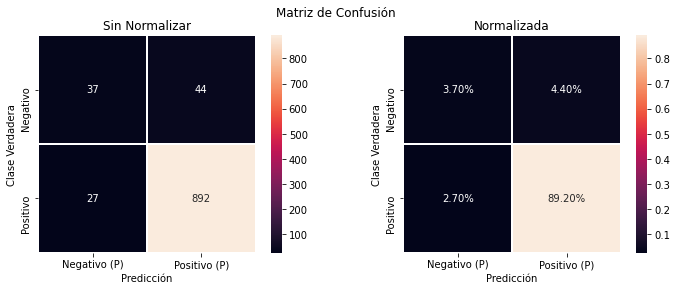

In [26]:
matriz_confusion(Y_test, Y_pred)

Como se puede observar en la matriz de confusión, los valores 26 y 902 corresponden a aciertos por parte del predictor entrenado de la IA, mientras que los valores 45 y 27 representan los fallos por parte del predictor de la IA. En particular, el valor "más peligroso" posible dio 27 por sobre una muestra de 1000, lo que representa un 2,7%. Aun sumando los fallos por parte del predictor, se cuenta con un 7,2% respecto a la muestra total, lo que hace una precisión del orden del 92%. Lógicamente, cabe aclarar que estos resultados, excelentes como pueden ser, dependen siempre de lo abarcativa que puede ser la muestra tomada del dataset, lo que implica que nunca se debe suponer que una muestra válida puede ser, por ejemplo, tomar las primera X filas de un dataset, en vez de usar los métodos creados para tal fin.

Ahora, sobre la muestra, se obtendrá un nuevo dataset el cual muestrear en el cual tanto TOBACCO y COPD (fumador y EPOC) sean enfermedades preexistentes y en función de eso entrenaremos a la IA

In [27]:
# Toma una muestra aleatoria de 10000 filas
df_puchos = df_sinNA[df_sinNA['TOBACCO'] == 1]
df_EPOCyPUCHOS = df_puchos[df_puchos['COPD'] == 1]
df_EPOCyPUCHOS


df_muestraEP = df_EPOCyPUCHOS.copy()

# Se usará el índice tanto en el muestreo como en el test para evitar usar la misma fila en ambos datasets
train_idx = df_muestraEP.sample(frac=0.9).index
test_idx = df_muestraEP.index.difference(train_idx)

# Crea los DataFrames de entrenamiento y prueba
df_train = df_muestraEP.loc[train_idx]
df_test = df_muestraEP.loc[test_idx]

# Separando las características (X) de la variable objetivo (Y) para el conjunto de entrenamiento
X2_train = df_train.drop('DATE_DIED', axis=1)  # Eliminamos la columna 'DATE_DIED' del dataset de entrenamiento
Y2_train = df_train['DATE_DIED']  # Seleccionamos la columna 'DATE_DIED' como variable objetivo

# Separando las features (X) de la variable objetivo (y) para el conjunto de prueba
X2_test = df_test.drop('DATE_DIED', axis=1)
Y2_test = df_test['DATE_DIED']

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 2921
Tamaño del conjunto de prueba: 325


In [28]:
model2 = RandomForestClassifier(n_estimators=1000)

model2.fit(X2_train, Y2_train)


Y2_pred = model2.predict(X2_test)

accuracy = accuracy_score(Y2_test, Y2_pred)
print("Precisión del modelo:", accuracy)

Y2_pred = model2.predict(X2_test)

Precisión del modelo: 0.7415384615384616


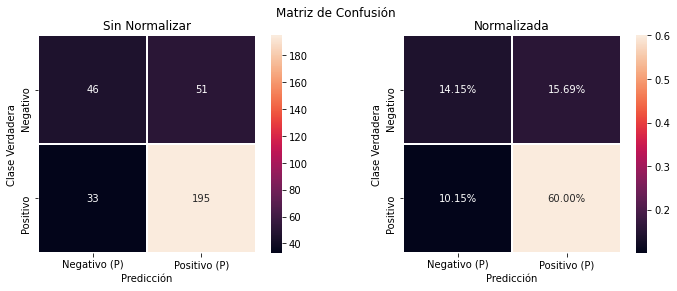

In [29]:
matriz_confusion(Y2_test, Y2_pred)

Como se puede observar, el modelo fue menos ineficiente analizando la nueva muestra. Es cierto que la muestra filtrando tanto fumador positivo como persona con EPOC terminó siendo de 3200 filas de tamaño (un tercio de la muestra que se tomó originalmente). Por tal motivo, se estimo no había suficientes datos como para entrenar adecuadamente a la IA. Se subió el nro de estimadores para el árbol de decisión, de 100 a 1000, pero sólo se obtuvo un 1% de mejora, lo cual no fue significativo.

In [30]:
# Se realizará un máquina de vectores de soporte para comprarar precisión

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Se utiliza la misma muestra que para los casos anteriores para comparar resultados

X1 = df_muestra.drop('DATE_DIED', axis=1)  
Y1 = df_muestra['DATE_DIED']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=3256)

In [31]:
model1 = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades
model1.fit(X1_train, Y1_train)
Y1_pred = model1.predict(X1_test)

accuracy = accuracy_score(Y1_test, Y1_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.943


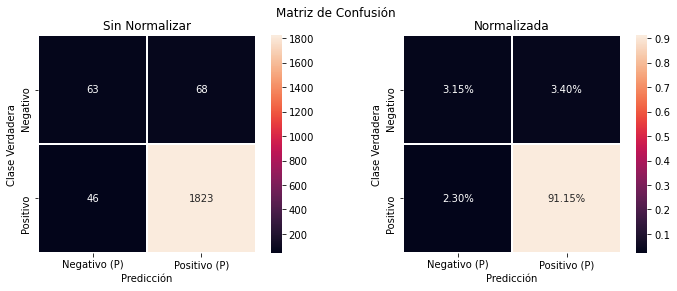

In [32]:
matriz_confusion(Y1_test, Y1_pred)

Como se puede observar, el nuevo modelo tuvo mejor performance que el modelo de árboles de decisión. Revisando las características de cada uno, es difícil encontrar alguna que fortalezca más a uno que al otro, salvo por la separabilidad lineal. Como el dataset está compuesto por muchas features que son, en su gran mayoría, de respuesta binaria (Afirmativo o Negativo en nros 1 y 2 respectivamente), y teniendo en cuenta que el kernel recomendado para estos casos es el de tipo lineal, en este universo es posible que se den mejores resultados con este modelo por sobre el modelo de árboles de decisión. No obstante, realizando el mismo entrenamiento usando diferentes semillas dio resultados distintos, llegando a casos en los que RFC fue superior a SVC. Lo bueno de estos modelos es que en todos los casos observados, se encontró con performance por encima del 90%, aunque sólo se probaron 4 semillas diferentes.

# Conclusiones finales

En este estudio se analizó un conjunto de datos de más de 1 millón de registros de pacientes con COVID-19, proveniente de Kaggle, con el objetivo de predecir si la mortalidad del paciente. Tras un proceso de limpieza que incluyó la eliminación de datos faltantes y la selección de características relevantes, se entrenaron modelos de Machine Learning para clasificar a los pacientes en sobrevivientes y fallecidos.

Se compararon los algoritmos de Random Forest y Support Vector Machine (SVM). Ambos modelos alcanzaron una precisión superior al 90%, con SVM obteniendo una leve mejora en desempeño promedio (93% vs. 92% para Random Forest). Los resultados sugieren que ambos algoritmos son adecuados para este tipo de problema y que las características seleccionadas, como las más de 10 features de comorbilidades presentes en el paciente antes del contagio, las cuales se estima fueron altamente predictivas de la mortalidad.

A través de visualizaciones como gráficos de torta, box plots y matrices de correlación, se identificaron patrones interesantes en los datos, como la edad en los pacientes que murieron por COVID intubados vs la edad de los pacientes que sobrevivieron al COVID intubados (se estima a pacientes de mayor edad se le priorizó la intubación y, por tanto, se estima tuvieron ese tratamiento más tiempo que en los pacientes más jóvenes. Sin embargo, es importante destacar las limitaciones del estudio, como el desbalance entre muertos y sobrevivientes (hay una proporción de 10 a 1 respecto a sobrevivientes) y la pérdida de información debido a la eliminación de datos faltantes (amén que hayan representado un 2% aproximado de la muestra (20000 filas vs 1 millón de filas).

Los resultados de este estudio sugieren que el uso de algoritmos de Machine Learning puede ser una herramienta valiosa para identificar pacientes con COVID-19 en alto riesgo de mortalidad. Al identificar tempranamente a estos pacientes, los profesionales de la salud pueden implementar estrategias de tratamiento más intensivas y personalizadas, mejorando así los resultados clínicos. Sin embargo, es fundamental reconocer que estos modelos son herramientas de apoyo a la decisión clínica y no deben reemplazar el juicio médico.


Estamos viviendo una época de crecimiento exponencial en lo referido a algoritmos de machine learning. Cada uno siendo más fuerte en su propio terreno, pero cubriendo la totalidad de problemáticas que se nos pueda ocurrir en su total. Lo que es más, día a día salen versiones que mejoran la precisión y hasta pueden utilizar la placa de video discreta a la hora de procesar los datos durante el entrenamiento, lo que genera procesos de entrenamiento cada vez más cortos y mejores resultados.